# **Entrega 2 Espècies que interactuen: competència**

<hr>

**Noms: **

**NIUs: **

**mails (gmail): **

<hr>

**Instruccions**

*   Primer copieu aquest notebook al vostre drive (Archivo>Guardar una copia en Drive).
*   Ompliu noms, NIUs i correus electrònics (gmail, si voleu rebre comentaris/feedback sobre la entrega) a l'encapçalament d'aquest Notebook.
*   Canvia el nom del Notebook a "Entrega2_niu.ipynb".
*   Aneu gravant/guardant el Notebook de forma regular.
*   Quan volgueu entregar, descarrega aquest quadern en format .ipynb i l'heu de pujar a la tasca del CV. Assegureu-vos que el fitxer té el nom correcte.
<hr>

Siguin 𝑃=𝑃(𝑡) i 𝑄=𝑄(𝑡) les poblacions de dues espècies en el temps 𝑡, i suposem que cada població creix de manera exponencial si no existís l'altra; és a dir, en absència de competència tindríem

𝑃′=𝑎𝑃   i   𝑄′=𝑏𝑄

on 𝑎 i 𝑏 són constants positives. Una manera de modelar l'efecte de la competència és suposar que la taxa de creixement per individu de cada població es redueix en una quantitat proporcional a l'altra població, de manera que l'equació anterior es substitueix per

𝑃′=𝑎𝑃−𝛼𝑄

𝑄′=−𝛽𝑃+𝑏𝑄,

on 𝛼 i 𝛽 són constants positives. (Com que la població negativa no té sentit, aquest sistema només funciona mentre 𝑃 i 𝑄 tots dos són positius). Ara suposem que 𝑃(0)=𝑃0>0 i 𝑄(0)=𝑄0>0.

1. Resol les equacions diferencials per 𝑃 i 𝑄, com a funció de 𝑃(0)=𝑃0>0, 𝑄(0)=𝑄0>0, 𝑃'(0)=𝑃1 i 𝑄'(0)=𝑄1. **[4 punts]**
2. Troba el límit per temps elevats de 𝑃(t)/𝑄(t).  **[3 punts]**
3. Seguint l'exemple de l'apèndix per dibuixar un camp de pendents, il.lustra el fenòmen anterior representant paramètricament 𝑄 versus 𝑃 (𝑃=𝑃(𝑡),𝑄=𝑄(𝑡) per 𝑡>0). Agafa 𝑎=𝛽=0,5, 𝑎=𝑏=1, i representa 𝑄 i 𝑃 entre 10 i 20. Visualitza la línea 𝐿 que passa per l'origen amb un cert pendent i que diferencia els dos possibles comportaments del sistema. Indica en cada punt l'increment del temps amb una fletxa. Ajut: d𝑄/d𝑃 = 𝑄'/𝑃' per la regla de la cadena. **[3 punts]**


In [ ]:
# Pregunta 1

In [ ]:
# Pregunta 2

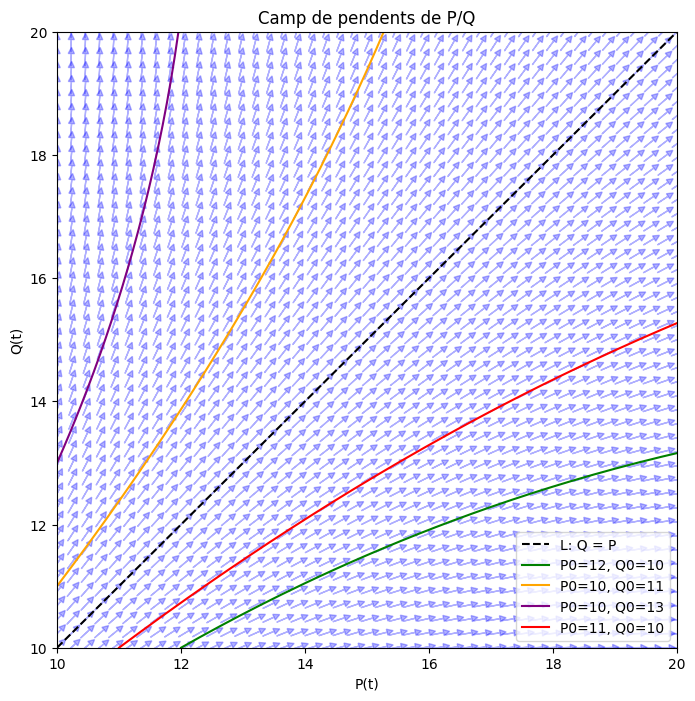

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

alpha = 0.5
beta = 0.5
a = 1
b = 1
# longitud de les fletxes
d = 0.2

plt.figure(figsize=(8, 8))

# camp de pendents
P_vals = np.linspace(10, 20, 45)
Q_vals = np.linspace(10, 20, 45)
for P in P_vals:
    for Q in Q_vals:
        if (a * P - alpha * Q) != 0:  # evitem divisio per zero
            dQdP = (-beta * P + b * Q) / (a * P - alpha * Q)
            # angle pendent
            theta = np.arctan(dQdP)
            # fletxa
            plt.arrow(P - 0.5 * d * np.cos(theta),
                      Q - 0.5 * d * np.sin(theta),
                      d * np.cos(theta),
                      d * np.sin(theta),
                      head_width=0.1, head_length=0.1, color='blue', alpha=0.3)

# linia Q = P
plt.plot(P_vals, P_vals, label='L: Q = P', color='black', linestyle='--')

# solucionem el sistema
def sist(t, vars):
    P, Q = vars
    dP = a * P - alpha * Q
    dQ = b * Q - beta * P
    return [dP, dQ]

def solsist(P0, Q0, t_f, num_punts):
    temps = np.linspace(0, t_f, num_punts)
    sol = solve_ivp(sist, [0, t_f], [P0, Q0], t_eval=temps)
    return sol.y[0], sol.y[1]

# plotejem diversos casos
# parelles de P0, Q0
valors_inicials = [(12, 10), (10, 11), (10, 13), (11,10)]
# forçem color (per a que sigui visible)
colorsllista = ['green', 'orange', 'purple', 'red']
# anem parella per parella
for (P0, Q0), color in zip(valors_inicials, colorsllista):
    Pi, Qi = solsist(P0, Q0, 10, 700)
    plt.plot(Pi, Qi, label=f'P0={P0}, Q0={Q0}', color=color)

plt.xlabel("P(t)")
plt.ylabel("Q(t)")
plt.title("Camp de pendents de P/Q")
plt.xlim(10, 20)
plt.ylim(10, 20)
plt.legend(loc='lower right')
plt.show()

**Apèndix:** Camp de pendents per $y' = x - y$

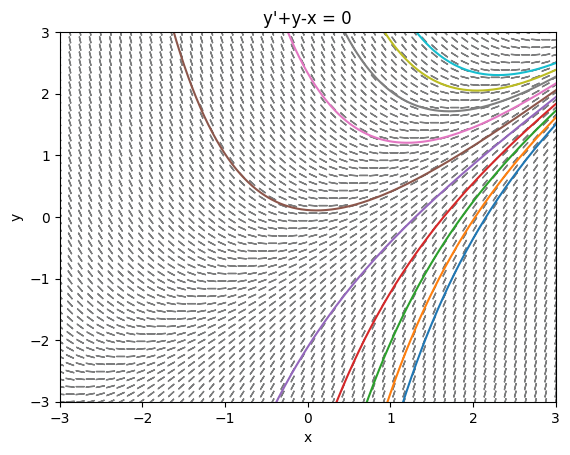

In [ ]:
import numpy as np  # Biblioteca numèrica per a operacions matemàtiques
import math         # Funcions matemàtiques bàsiques
import matplotlib.pyplot as plt  # Biblioteca per a la creació de gràfics i visualitzacions
from IPython.display import display, Latex  # Funcions per a la visualització en Jupyter Notebook

#y' = x - y

x = np.linspace(-3,3,1000)
f = lambda x: C*np.exp(-x)+x-1
f2 = lambda x: x + 5*x/(5*C-x**5)

for i in np.linspace(-10,10,10):
  C=i
  plt.plot(x,f(x))
plt.xlim(-3,3)
plt.ylim(-3,3)
#plt.show()

vx = np.linspace(-3,3,50)
vy = np.linspace(-3,3,50)

d = 0.1

for xp in vx:
  for yp in vy:
    yder = xp-yp
#    yder = xp**3 * (yp-xp)**2 +yp/xp
#    yder = -1*(2*xp +3*yp)/(3*xp+ 2*yp)
    theta = np.arctan(yder)
#    print(yder)
    plt.arrow(xp-.5*d*np.cos(theta),yp-.5*d*np.sin(theta),d*np.cos(theta),d*np.sin(theta),alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y'+y-x = 0")
plt.show()
